 # Análise dos dados - Projeto I
 
 link:https://www.kaggle.com/adaoduque/campeonato-brasileiro-de-futebol
 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:

dados = pd.read_csv('dados/campeonato-brasileiro-full.csv')

In [3]:
dados.head(10)

,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate
5,16h00,Domingo,2000-07-30,Guarani,Santa Cruz,-,1ª Rodada,Brinco de Ouro,0,0,SP,PE,Empate
6,17h00,Domingo,2000-07-30,Cruzeiro,Athlético-PR,Athlético-PR,1ª Rodada,Mineirão,0,2,MG,PR,PR
7,16h00,Domingo,2000-07-30,América-MG,Gama,Gama,1ª Rodada,Independência,0,1,MG,DF,DF
8,18h30,Domingo,2000-07-30,Goiás,Corinthians,Goiás,1ª Rodada,Serra Dourada,3,0,GO,SP,GO
9,20h30,Quarta-feira,2000-08-02,Coritiba,Sport,-,2ª Rodada,Couto Pereira,0,0,PR,PE,Empate


## Informacoes gerais do banco de dados

In [7]:
dados.info() # Informacoes gerais sobre o dataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Horário                7582 non-null   object
 1   Dia                    7939 non-null   object
 2   Data                   7939 non-null   object
 3   Clube 1                7939 non-null   object
 4   Clube 2                7939 non-null   object
 5   Vencedor               7939 non-null   object
 6   Rodada                 7939 non-null   object
 7   Arena                  7939 non-null   object
 8   Clube 1 Gols           7939 non-null   int64 
 9   Clube 2 Gols           7939 non-null   int64 
 10  Clube 1 Estado         7939 non-null   object
 11  Clube 2 Estado         7939 non-null   object
 12  Estado Clube Vencedor  7939 non-null   object
dtypes: int64(2), object(11)
memory usage: 806.4+ KB


In [10]:
dados_info = pd.DataFrame(dados.dtypes , columns =['Tipos de dados'])

In [15]:
dados_info.columns.name = 'Variáveis'
dados_info

Variáveis,Tipos de dados
Horário,object
Dia,object
Data,object
Clube 1,object
Clube 2,object
Vencedor,object
Rodada,object
Arena,object
Clube 1 Gols,int64
Clube 2 Gols,int64


## Limpando o banco de dados

As colunas Horário, Dia, Data, Estado Clube Vencedor não serão utilzados nessa análise de dados

In [32]:
dados_limpos = dados.drop(['Horário','Dia','Data'], axis = 1)
dados_limpos.head()

,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


In [142]:
dados_limpos['Vencedor'].replace('-','Empate', inplace = True)
dados_limpos.head(10)

,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,Botafogo-RJ,Atlético-MG,Empate,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,Juventude,Flamengo,Empate,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate
5,Guarani,Santa Cruz,Empate,1ª Rodada,Brinco de Ouro,0,0,SP,PE,Empate
6,Cruzeiro,Athlético-PR,Athlético-PR,1ª Rodada,Mineirão,0,2,MG,PR,PR
7,América-MG,Gama,Gama,1ª Rodada,Independência,0,1,MG,DF,DF
8,Goiás,Corinthians,Goiás,1ª Rodada,Serra Dourada,3,0,GO,SP,GO
9,Coritiba,Sport,Empate,2ª Rodada,Couto Pereira,0,0,PR,PE,Empate


## Qual time que mais ganhou ? 

In [143]:
ganhadores = dados_limpos['Vencedor'].value_counts()
ganhadores.drop(labels=['Empate'],inplace = True) # Retirando Empate

In [117]:
dados_ganhadores = pd.DataFrame(ganhadores)
dados_ganhadores.columns = ['N de Vitorias']
dados_ganhadores.columns.name = 'Equipes'
dados_ganhadores.head(10)


Equipes,N de Vitorias
São Paulo,348
Cruzeiro,322
Santos,319
Grêmio,308
Internacional,302
Flamengo,298
Corinthians,293
Athlético-PR,291
Fluminense,288
Atlético-MG,282


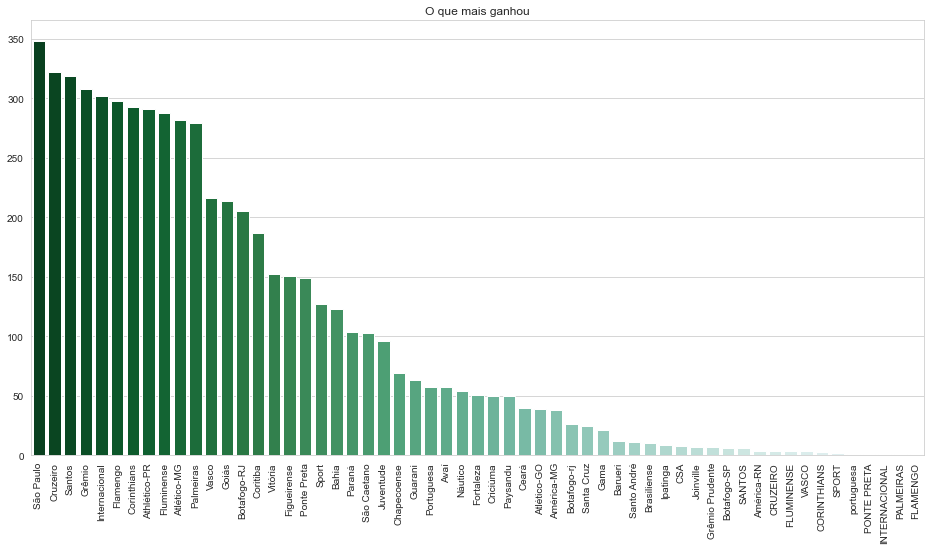

In [160]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
ax = sns.barplot(x = ganhadores.index,
                 y = ganhadores.values,
            palette = sns.color_palette("BuGn_r", n_colors=len(ganhadores) + 4))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('O que mais ganhou')
plt.show()

# Análise dos empate

In [149]:
selecao = (dados_limpos['Vencedor'] == 'Empate')
dados_empate = dados_limpos[selecao]
dados_empate.head()

,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
3,Botafogo-RJ,Atlético-MG,Empate,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,Juventude,Flamengo,Empate,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate
5,Guarani,Santa Cruz,Empate,1ª Rodada,Brinco de Ouro,0,0,SP,PE,Empate
9,Coritiba,Sport,Empate,2ª Rodada,Couto Pereira,0,0,PR,PE,Empate
16,Palmeiras,Botafogo-RJ,Empate,2ª Rodada,Pq. Antarctica,0,0,SP,RJ,Empate


In [156]:
dados_empate_mandate = dados_empate['Clube 1'].value_counts()
dados_emapte_visitante = dados_empate['Clube 2'].value_counts()

## Quem mais empatou como mandante?

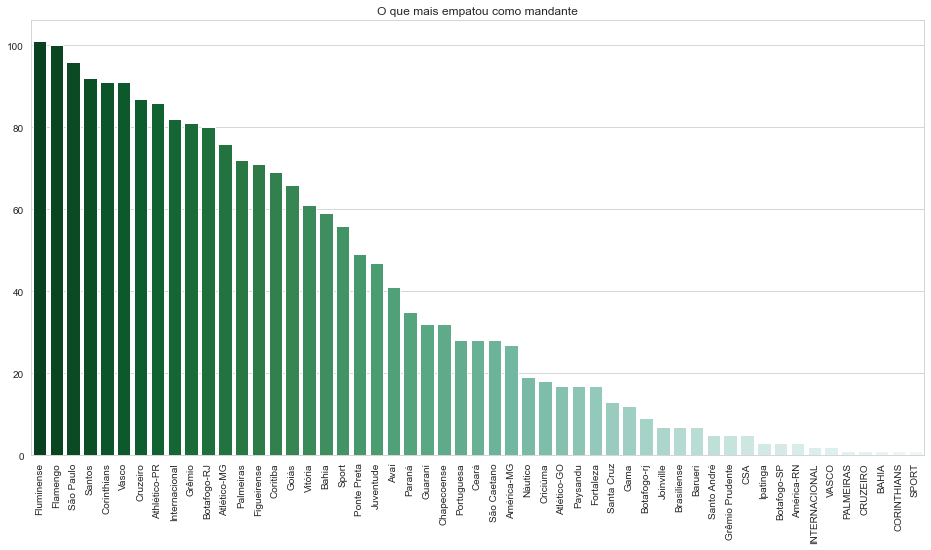

In [159]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
ax = sns.barplot(x = dados_empate_mandate.index,
                 y = dados_empate_mandate.values,
            palette = sns.color_palette("BuGn_r", n_colors=len(dados_empate_mandate) + 4))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('O que mais empatou como mandante')
plt.show()

In [166]:
selecao = dados_empate_mandate >= 40
acima_40_emapte = dados_empate_mandate[selecao]

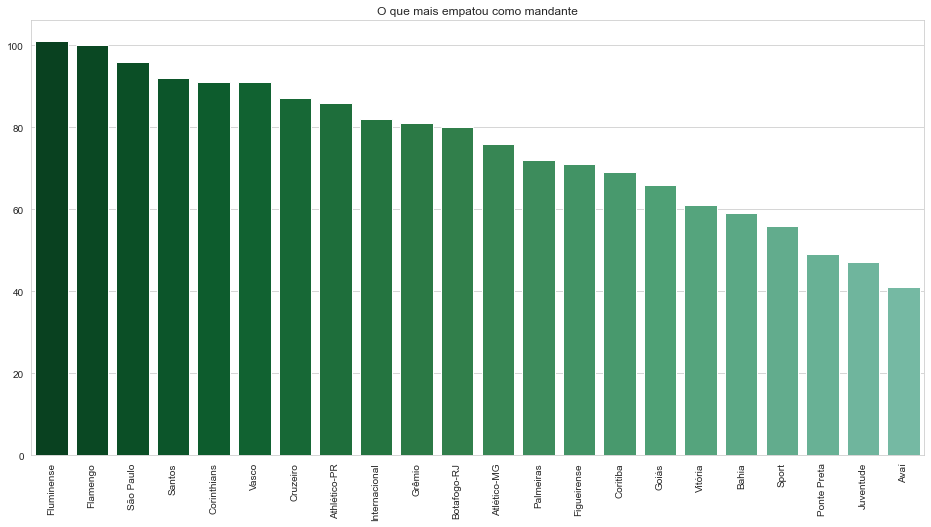

In [169]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
ax = sns.barplot(x = acima_40_emapte.index,
                 y = acima_40_emapte.values,
            palette = sns.color_palette("BuGn_r", n_colors=len(acima_40_emapte) + 20))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('O que mais empatou como mandante(até 40)')
plt.show()

## Quem mais empatou como visitante  ?

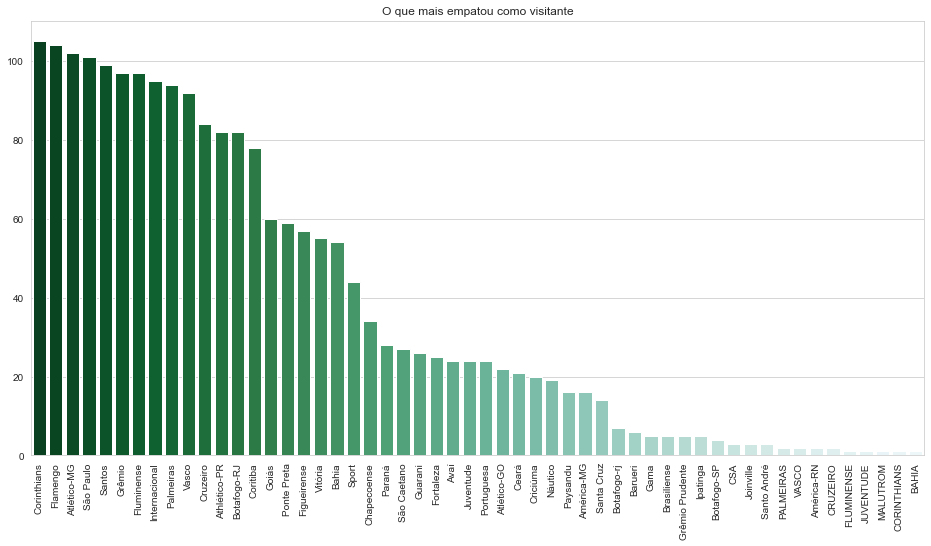

In [162]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
ax = sns.barplot(x = dados_emapte_visitante.index,
                 y = dados_emapte_visitante.values,
            palette = sns.color_palette("BuGn_r", n_colors=len(dados_emapte_visitante) + 4))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('O que mais empatou como visitante')
plt.show()

In [170]:
selecao = dados_emapte_visitante >= 40
acima_40_emapte = dados_emapte_visitante[selecao]

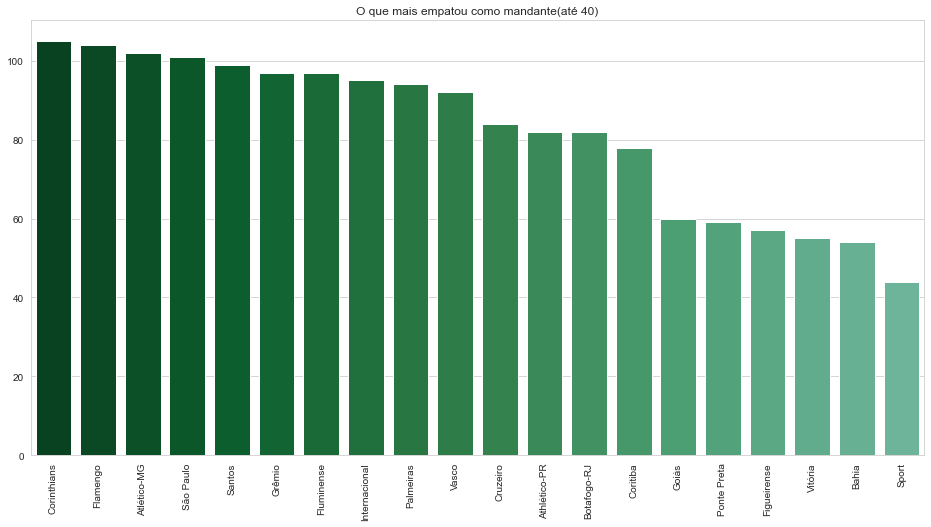

In [171]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
ax = sns.barplot(x = acima_40_emapte.index,
                 y = acima_40_emapte.values,
            palette = sns.color_palette("BuGn_r", n_colors=len(acima_40_emapte) + 20))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('O que mais empatou como mandante(até 40)')
plt.show()

# Análise sobre o Timão
## Verificar quantas vezes jogou contra o palmeiras

In [176]:
selecao = ((dados_limpos['Clube 1'] == 'Corinthians') & (dados_limpos['Clube 2'] == 'Palmeiras')) | ((dados_limpos['Clube 1'] == 'Palmeiras') & (dados_limpos['Clube 2'] == 'Corinthians'))
timao_vs_palmeiras = dados_limpos[selecao]
timao_vs_palmeiras.head()

,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
53,Palmeiras,Corinthians,Corinthians,7ª Rodada,Morumbi,0,1,SP,SP,SP
535,Corinthians,Palmeiras,Corinthians,15ª Rodada,Morumbi,4,2,SP,SP,SP
958,Corinthians,Palmeiras,Empate,22ª Rodada,Morumbi,2,2,SP,SP,Empate
1649,Corinthians,Palmeiras,Palmeiras,4ª Rodada,Morumbi,0,4,SP,SP,SP
1926,Palmeiras,Corinthians,Corinthians,27ª Rodada,Morumbi,0,1,SP,SP,SP


In [183]:
vencedores_timao_vs_palmeiras = timao_vs_palmeiras['Vencedor'].value_counts()
local_timao_vs_palmeiras = timao_vs_palmeiras['Arena'].value_counts()


Morumbi               11
Pacaembu               6
Arena Corinthians      6
Allianz Parque         2
Palestra Itália        2
Eduardo José Farah     2
Prudentão              1
Name: Arena, dtype: int64

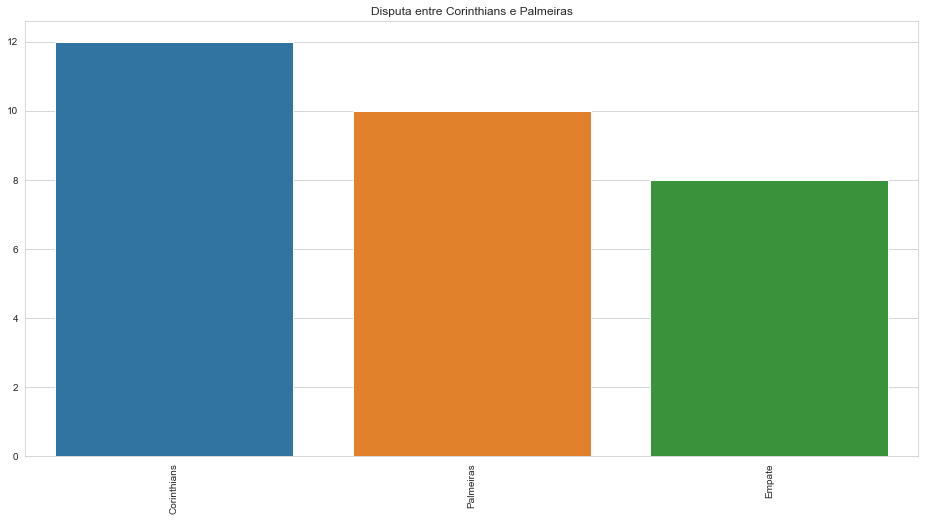

In [181]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
ax = sns.barplot(x = vencedores_timao_vs_palmeiras.index,
                 y = vencedores_timao_vs_palmeiras.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Disputa entre Corinthians e Palmeiras')
plt.show()

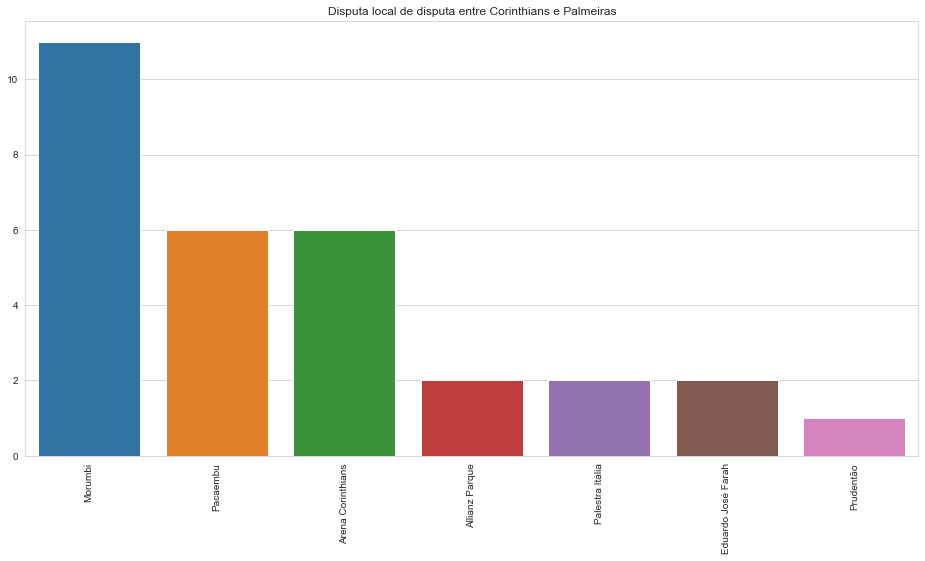

In [184]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
ax = sns.barplot(x = local_timao_vs_palmeiras.index,
                 y = local_timao_vs_palmeiras.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Disputa local de disputa entre Corinthians e Palmeiras')
plt.show()

In [212]:
# Dentro de casa
selecao = (timao_vs_palmeiras['Clube 1 Gols'] > timao_vs_palmeiras['Clube 2 Gols'])  & (timao_vs_palmeiras['Clube 1'] == 'Corinthians') 
gols_timao_em_casa = timao_vs_palmeiras[selecao]


# Fora de casa
selecao = (timao_vs_palmeiras['Clube 2 Gols'] > timao_vs_palmeiras['Clube 1 Gols'])  & (timao_vs_palmeiras['Clube 2'] == 'Corinthians')
gols_timao_fora_de_casa = timao_vs_palmeiras[selecao]



In [211]:
frame_gols_timao_fora_de_casa = gols_timao_fora_de_casa.drop(['Rodada','Clube 1 Estado','Clube 2 Estado','Estado Clube Vencedor'], axis = 1)
frame_gols_timao_fora_de_casa

,Clube 1,Clube 2,Vencedor,Arena,Clube 1 Gols,Clube 2 Gols
53,Palmeiras,Corinthians,Corinthians,Morumbi,0,1
1926,Palmeiras,Corinthians,Corinthians,Morumbi,0,1
5145,Palmeiras,Corinthians,Corinthians,Pacaembu,0,2
6921,Palmeiras,Corinthians,Corinthians,Palestra Itália,0,2


In [213]:
frame_gols_timao_em_casa = gols_timao_em_casa.drop(['Rodada','Clube 1 Estado','Clube 2 Estado','Estado Clube Vencedor'], axis = 1)
frame_gols_timao_em_casa

,Clube 1,Clube 2,Vencedor,Arena,Clube 1 Gols,Clube 2 Gols
535,Corinthians,Palmeiras,Corinthians,Morumbi,4,2
2271,Corinthians,Palmeiras,Corinthians,Morumbi,3,1
2919,Corinthians,Palmeiras,Corinthians,Morumbi,1,0
4446,Corinthians,Palmeiras,Corinthians,Pacaembu,1,0
4954,Corinthians,Palmeiras,Corinthians,Pacaembu,2,1
5772,Corinthians,Palmeiras,Corinthians,Arena Corinthians,2,0
7116,Corinthians,Palmeiras,Corinthians,Arena Corinthians,3,2
7222,Corinthians,Palmeiras,Corinthians,Arena Corinthians,1,0


In [216]:
frames = [frame_gols_timao_fora_de_casa,frame_gols_timao_em_casa]
vitorias_timao = pd.concat(frames)
vitorias_timao

,Clube 1,Clube 2,Vencedor,Arena,Clube 1 Gols,Clube 2 Gols
53,Palmeiras,Corinthians,Corinthians,Morumbi,0,1
1926,Palmeiras,Corinthians,Corinthians,Morumbi,0,1
5145,Palmeiras,Corinthians,Corinthians,Pacaembu,0,2
6921,Palmeiras,Corinthians,Corinthians,Palestra Itália,0,2
535,Corinthians,Palmeiras,Corinthians,Morumbi,4,2
2271,Corinthians,Palmeiras,Corinthians,Morumbi,3,1
2919,Corinthians,Palmeiras,Corinthians,Morumbi,1,0
4446,Corinthians,Palmeiras,Corinthians,Pacaembu,1,0
4954,Corinthians,Palmeiras,Corinthians,Pacaembu,2,1
5772,Corinthians,Palmeiras,Corinthians,Arena Corinthians,2,0


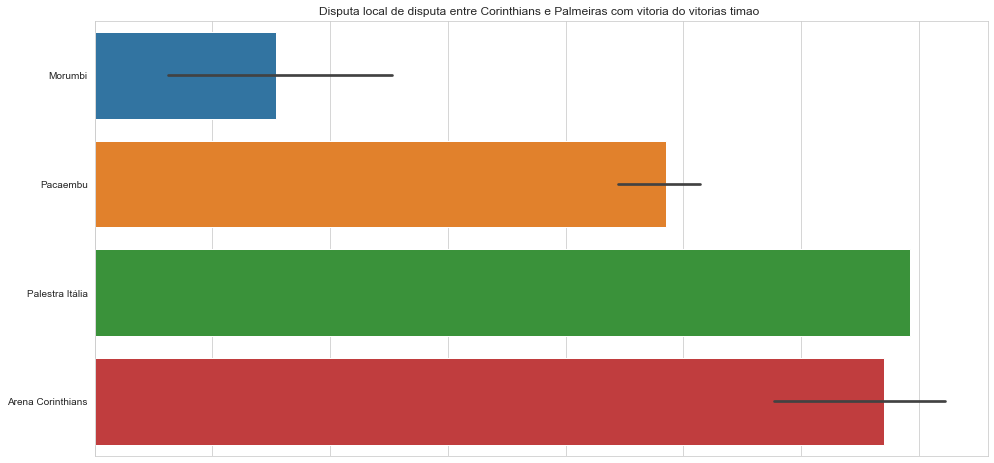

In [219]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
ax = sns.barplot(x = vitorias_timao['Arena'].index,
                 y = vitorias_timao['Arena'].values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Disputa local de disputa entre Corinthians e Palmeiras com vitoria do vitorias timao ')
plt.show()